In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os
sns.set_style("darkgrid")

In [4]:
path = "C:\\Users\hp\Desktop\SM-RuleMiner\Working code\Data\\"
df = pd.read_csv(path + "diabetes.csv")
cols = df.columns.tolist()[:-1]
df.head()
for col in cols:
    print(f"{col} : {df[col].min()} {df[col].max()}")

Pregnancies : 0 17
Glucose : 0 199
BloodPressure : 0 122
SkinThickness : 0 99
Insulin : 0 846
BMI : 0.0 67.1
DiabetesPedigreeFunction : 0.078 2.42
Age : 21 81


In [20]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X = df[cols]
y = df["Outcome"]
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)


X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Outcome'])

df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

In [21]:
# Distribution of classes
df.groupby("Outcome").size()

# 0 -> diabetes negative
# 1 -> diabetes positive

Outcome
0    500
1    500
dtype: int64

In [12]:
df_pos = df[df["Outcome"] == 1]
df_neg = df[df["Outcome"] == 0]

In [44]:
def plot(label):
    print(label)
    plt.figure(figsize = (16,9))
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    sns.histplot(data = df_neg[label],ax = ax[0])
    sns.histplot(data = df_pos[label],ax = ax[1])
    ax[0].set_title("Negative")
    ax[1].set_title("Postivie")
    path = f"Data\Distribution\\{label}.png"
    plt.savefig(path)

Pregnancies

----------------------------------------------------------------------

Glucose

----------------------------------------------------------------------

BloodPressure

----------------------------------------------------------------------

SkinThickness

----------------------------------------------------------------------

Insulin

----------------------------------------------------------------------

BMI

----------------------------------------------------------------------

DiabetesPedigreeFunction

----------------------------------------------------------------------

Age

----------------------------------------------------------------------



<Figure size 1152x648 with 0 Axes>

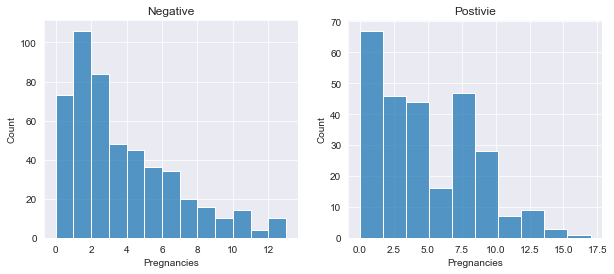

<Figure size 1152x648 with 0 Axes>

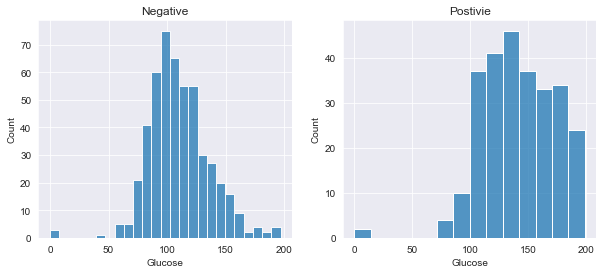

<Figure size 1152x648 with 0 Axes>

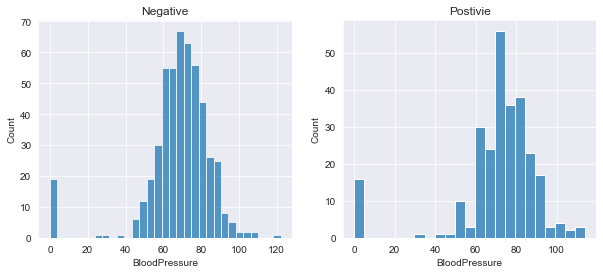

<Figure size 1152x648 with 0 Axes>

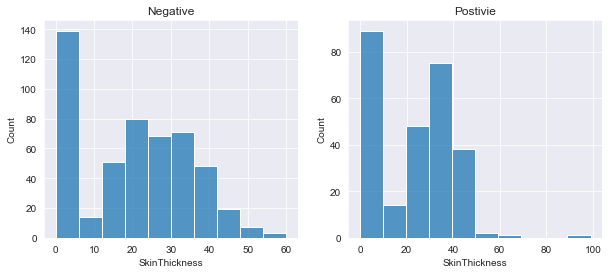

<Figure size 1152x648 with 0 Axes>

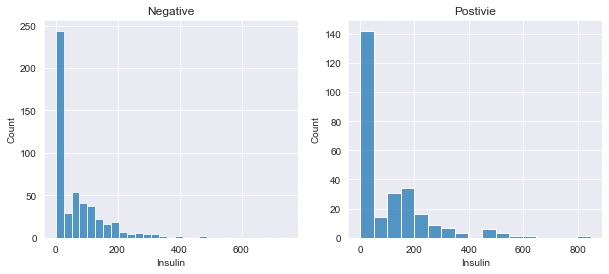

<Figure size 1152x648 with 0 Axes>

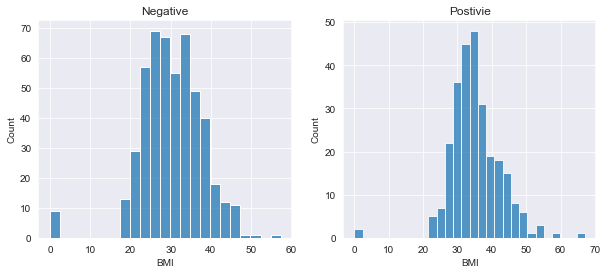

<Figure size 1152x648 with 0 Axes>

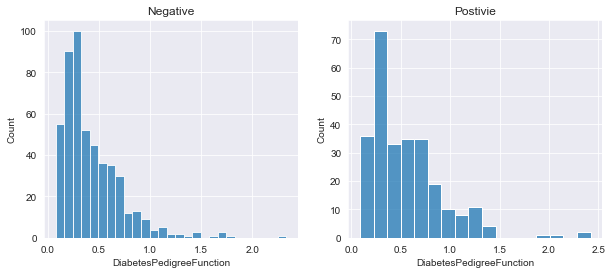

<Figure size 1152x648 with 0 Axes>

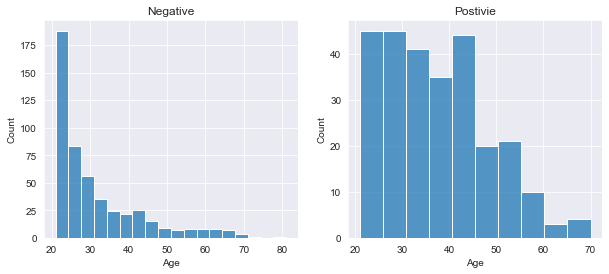

In [45]:
for col in cols:
    plot(col)
    print("\n----------------------------------------------------------------------\n")

In [41]:
def plot_scatter(col1,col2):
    print(col1 + " <=> " + col2)
    plt.figure(figsize = (16,9))
    sns.scatterplot(x = df[col1],y = df[col2],hue = df["Outcome"])
    path = f"Data\Scatter\\{col1} and {col2}.png"
    plt.savefig(path)

Pregnancies <=> Glucose
Pregnancies <=> BloodPressure
Pregnancies <=> SkinThickness
Pregnancies <=> Insulin
Pregnancies <=> BMI
Pregnancies <=> DiabetesPedigreeFunction
Pregnancies <=> Age
Glucose <=> BloodPressure
Glucose <=> SkinThickness
Glucose <=> Insulin
Glucose <=> BMI
Glucose <=> DiabetesPedigreeFunction
Glucose <=> Age
BloodPressure <=> SkinThickness
BloodPressure <=> Insulin
BloodPressure <=> BMI
BloodPressure <=> DiabetesPedigreeFunction
BloodPressure <=> Age
SkinThickness <=> Insulin
SkinThickness <=> BMI
SkinThickness <=> DiabetesPedigreeFunction


C:\Users\hp\AppData\Local\Temp/ipykernel_17576/1856884919.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (16,9))


SkinThickness <=> Age
Insulin <=> BMI
Insulin <=> DiabetesPedigreeFunction
Insulin <=> Age
BMI <=> DiabetesPedigreeFunction
BMI <=> Age
DiabetesPedigreeFunction <=> Age


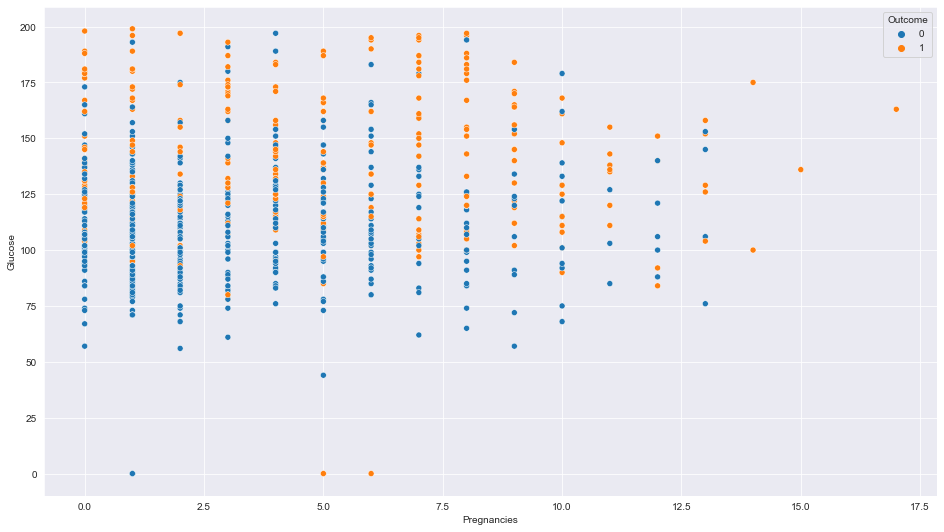

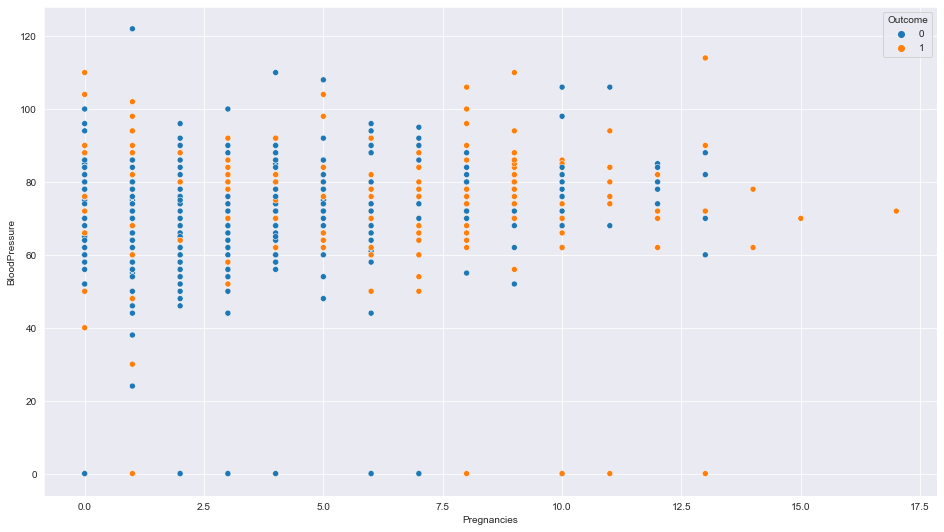

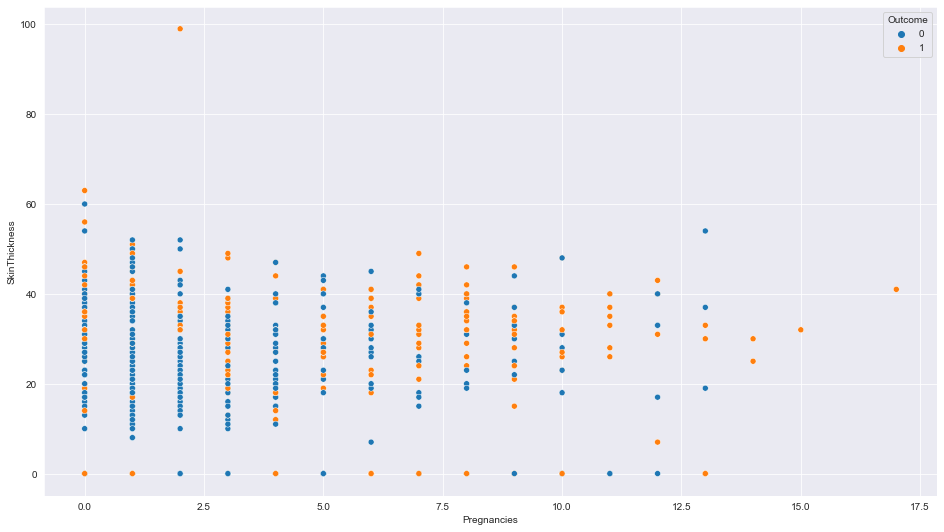

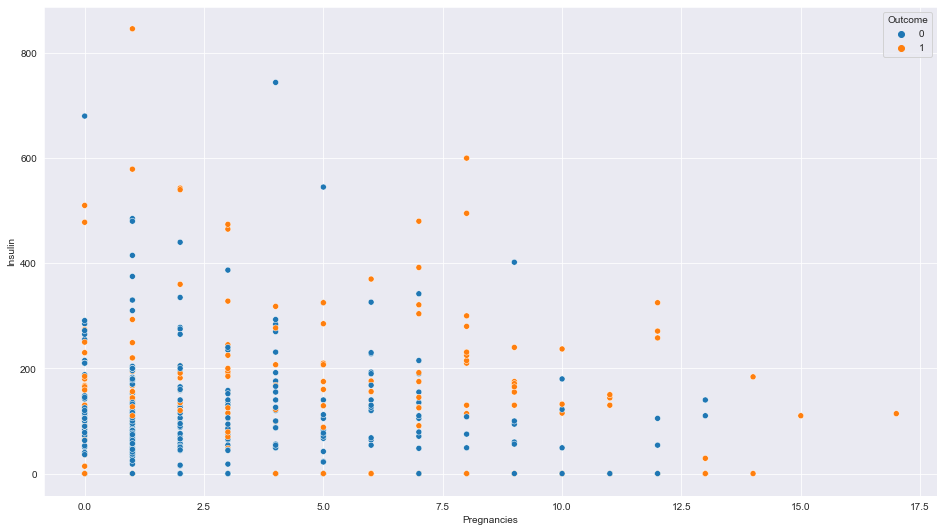

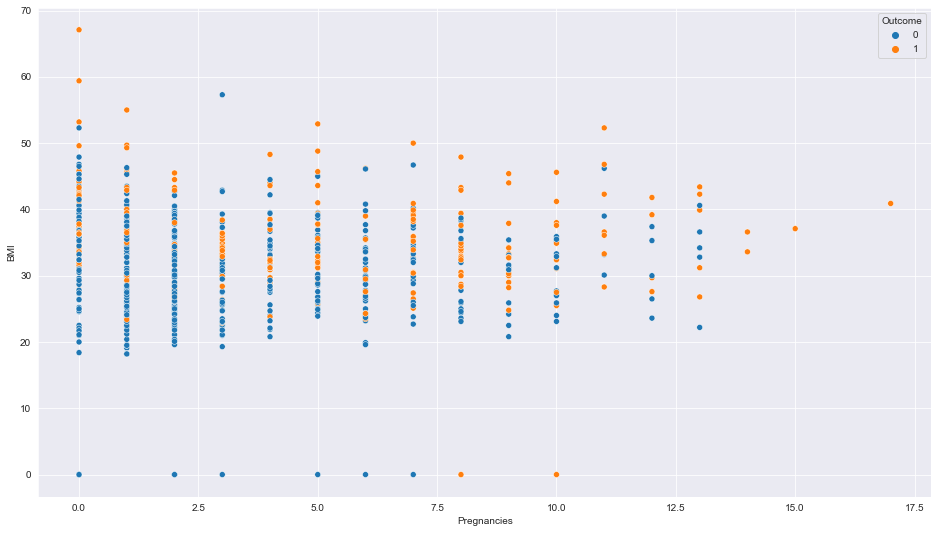

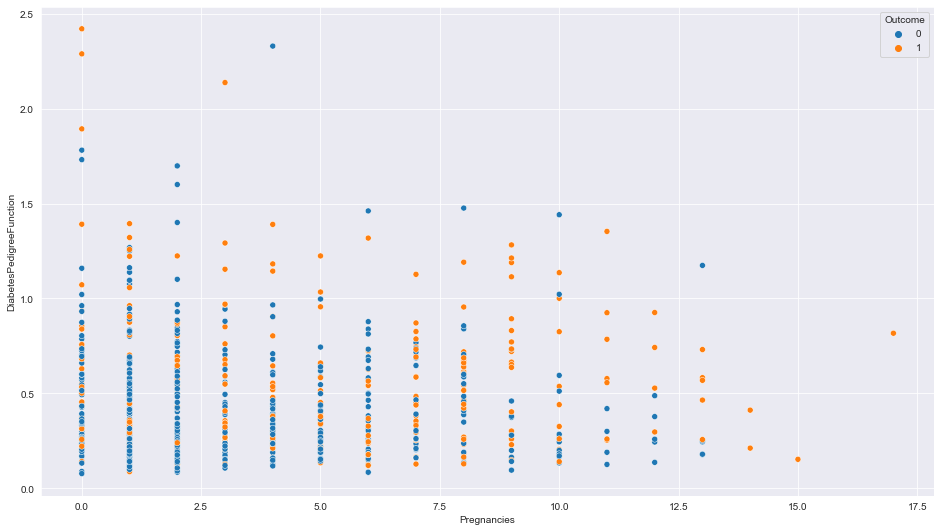

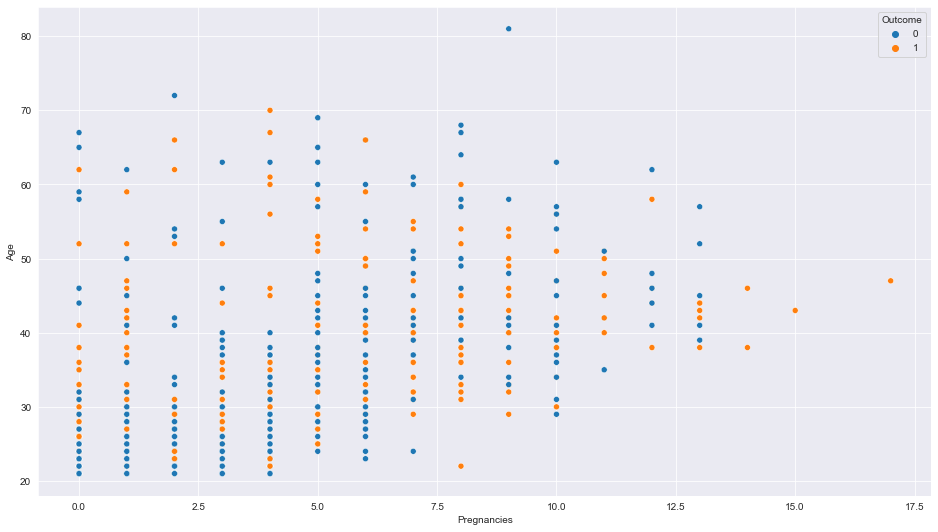

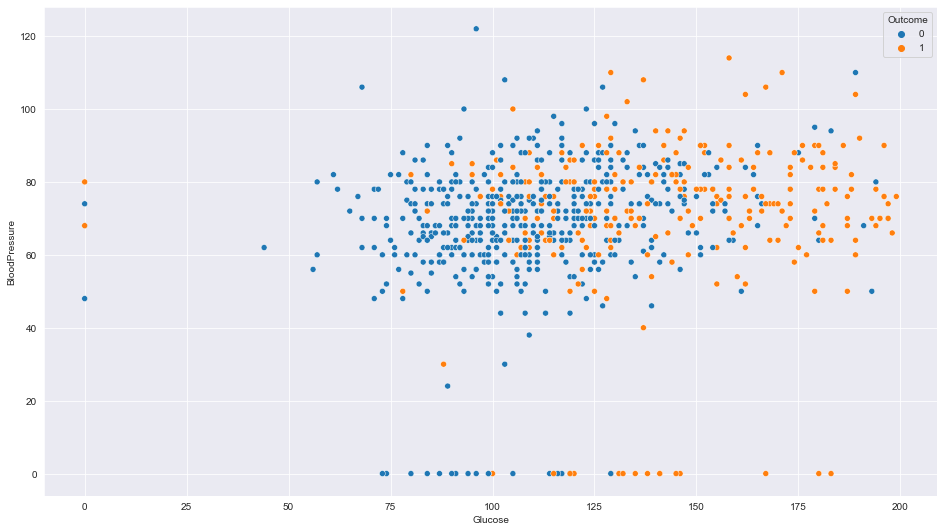

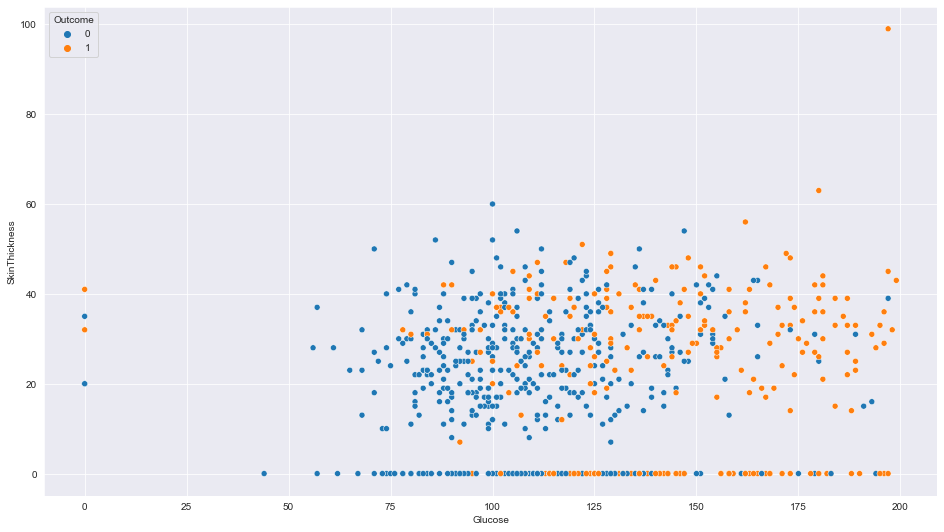

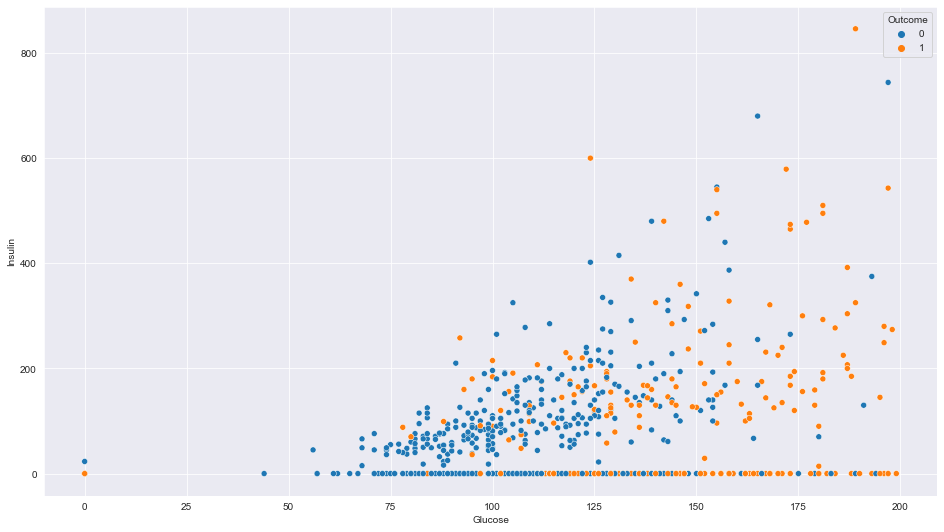

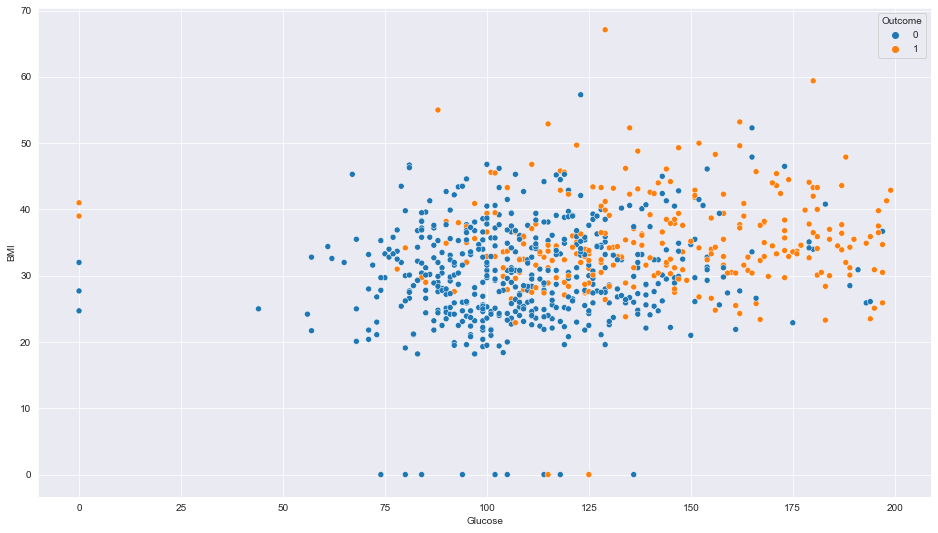

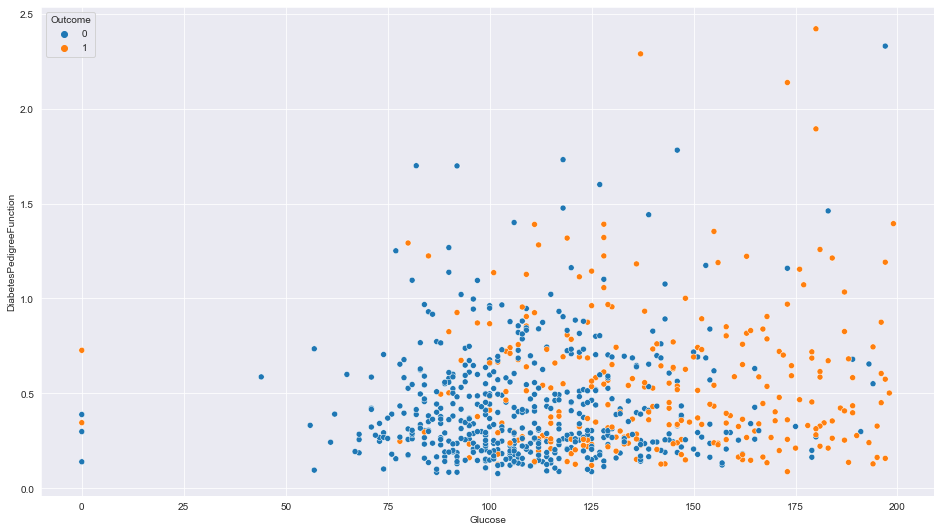

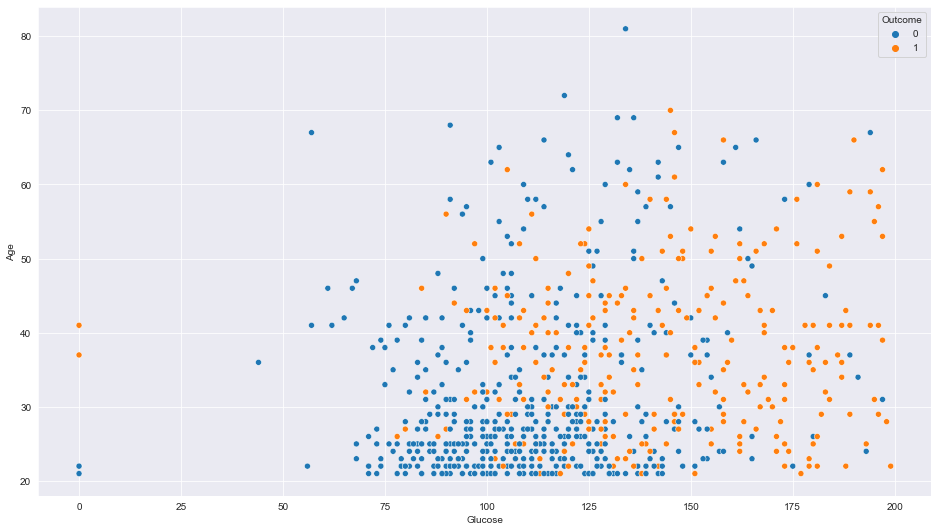

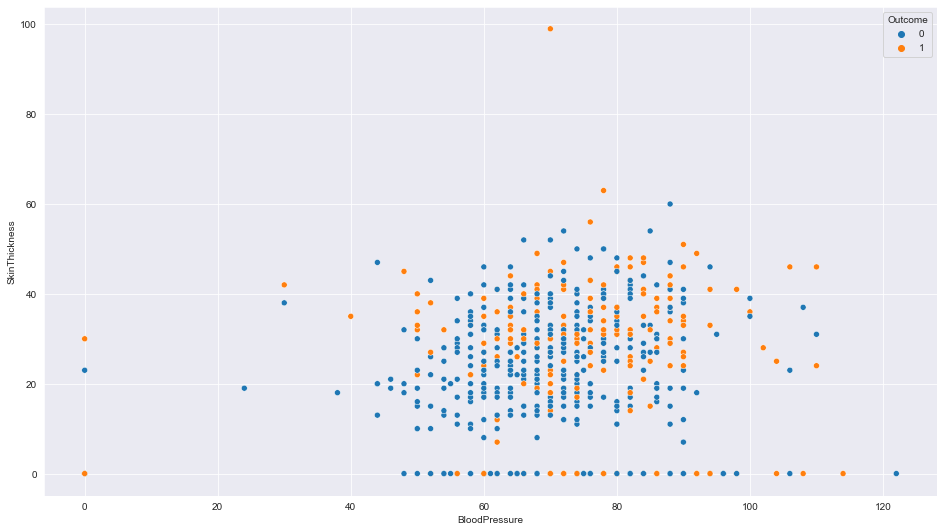

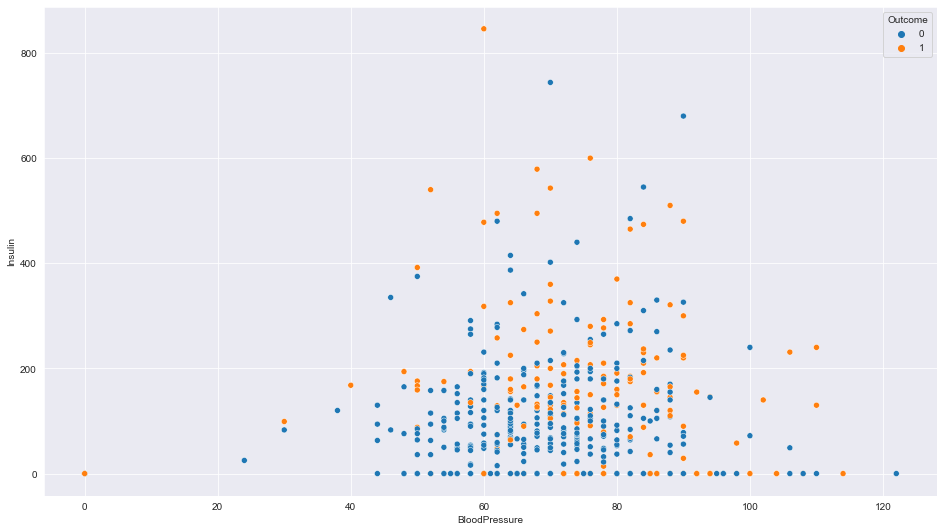

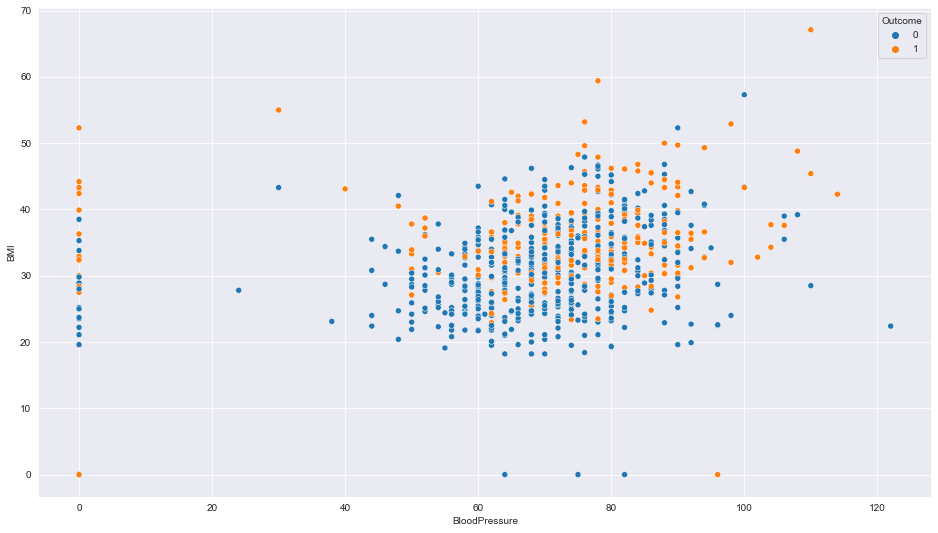

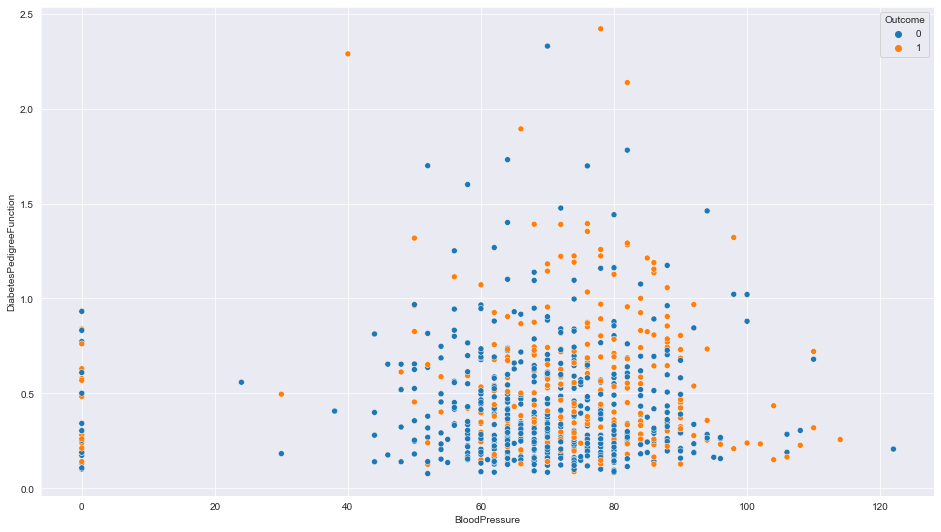

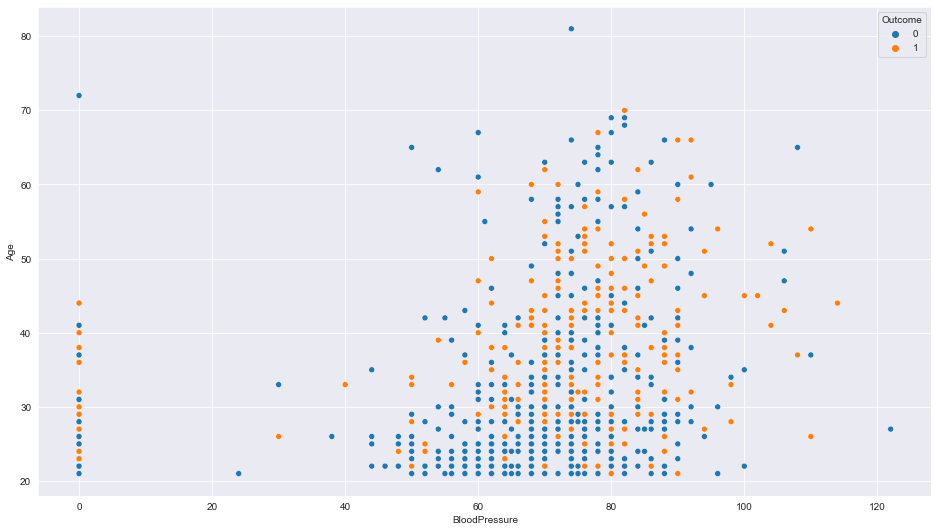

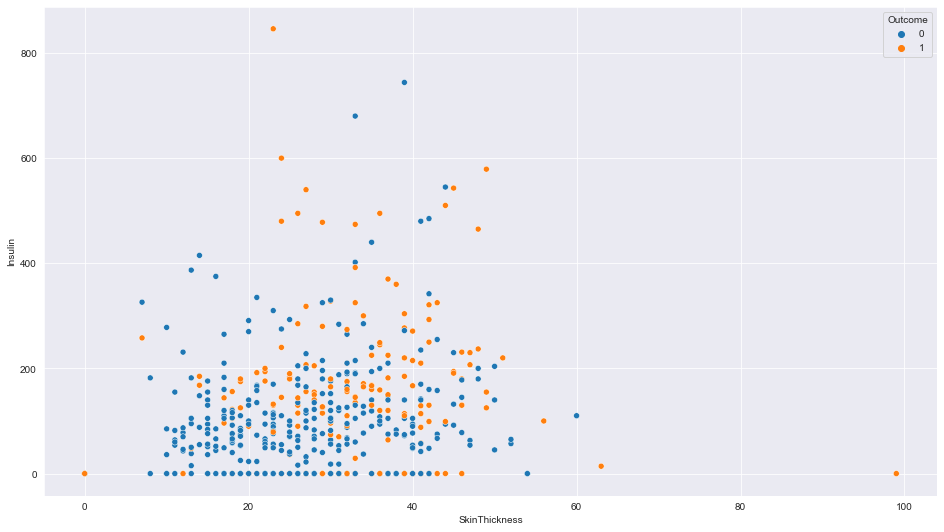

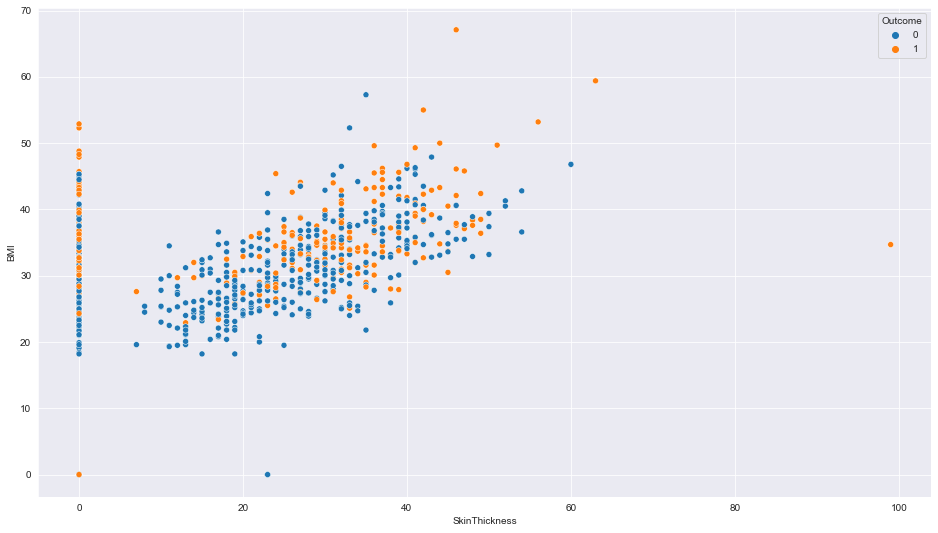

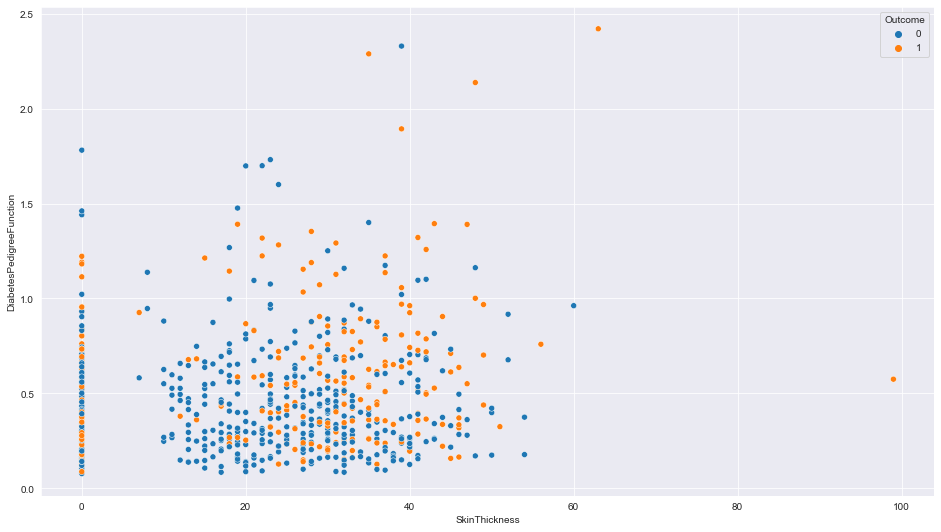

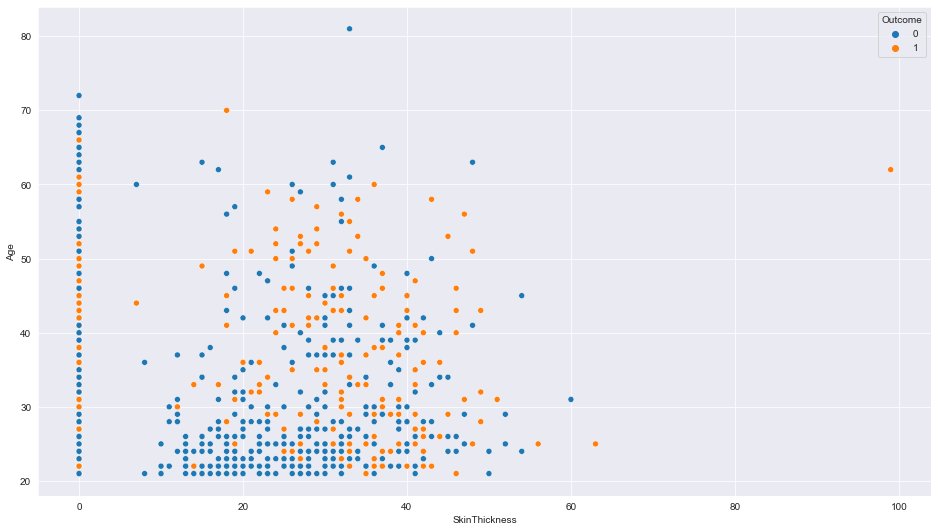

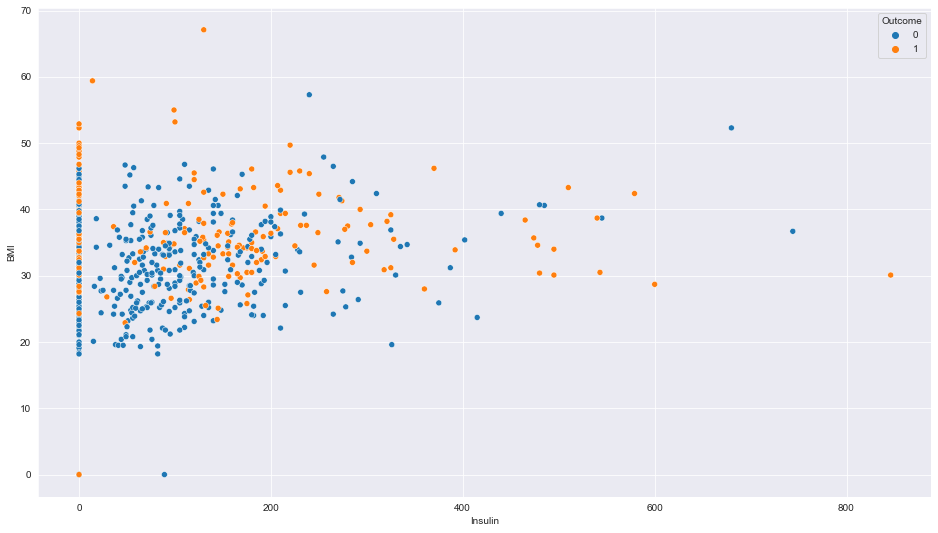

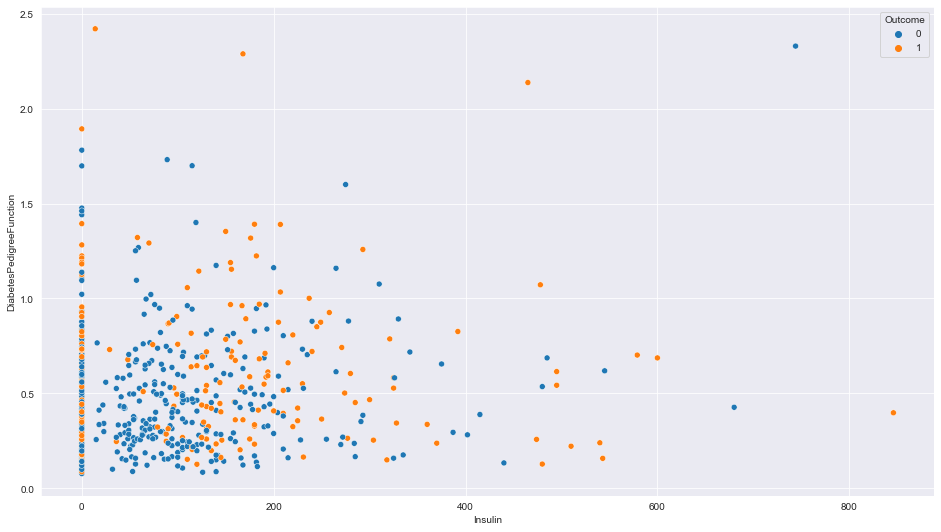

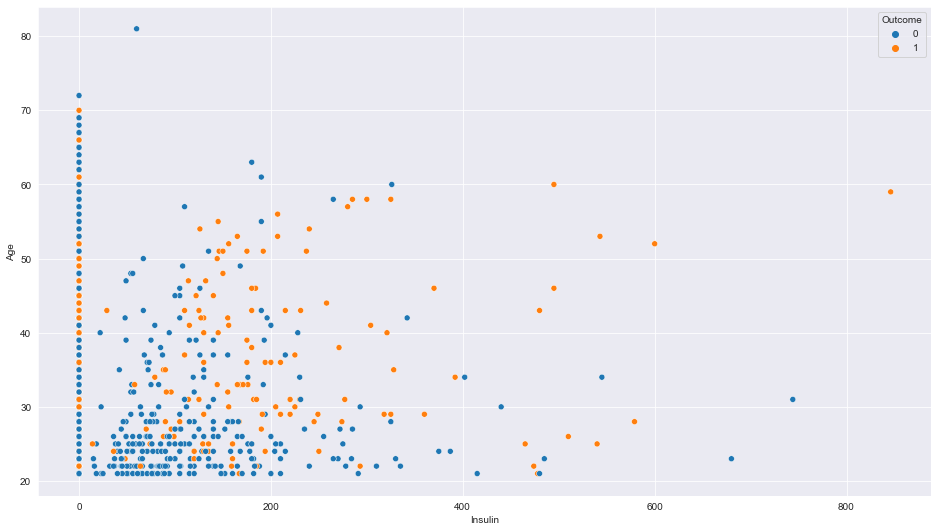

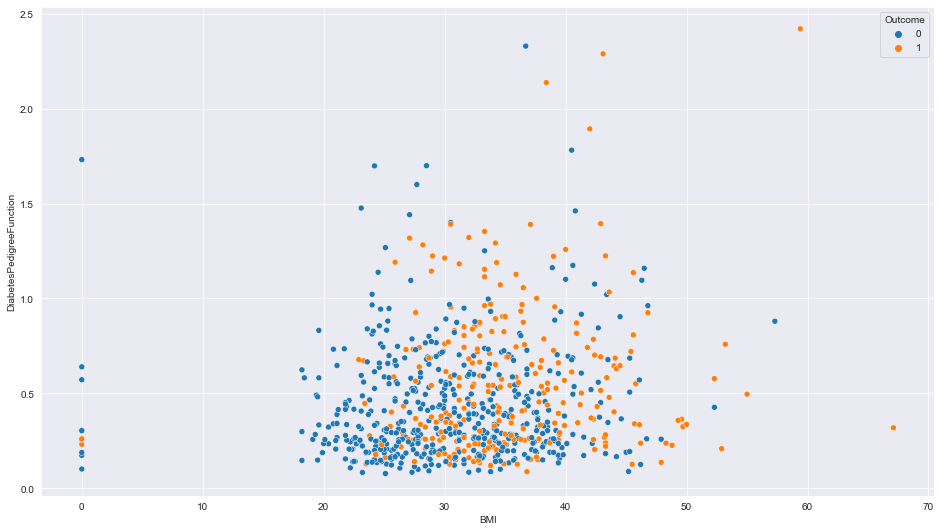

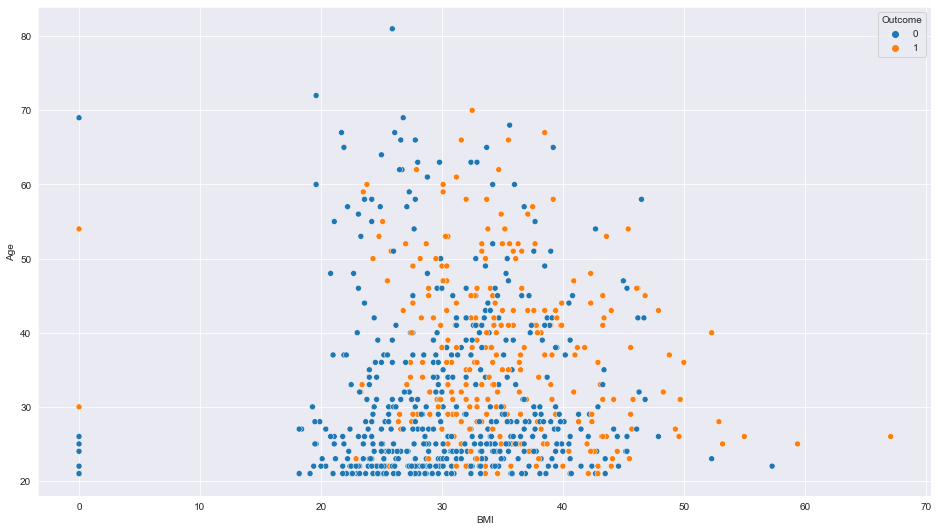

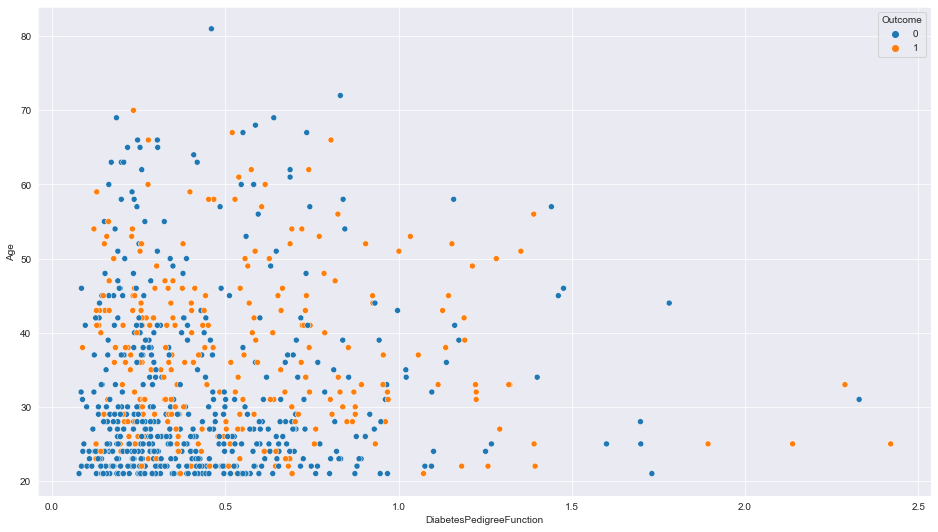

In [42]:
for i in range(len(cols)):
    for j in range(i + 1,len(cols)):
        plot_scatter(cols[i],cols[j])